In [ ]:
#pip install keras_vggface


In [ ]:
#%pip install git+https://github.com/ufukbakan/keras-vggface-tensorflow-2.git

In [1]:
import os
import cv2
import shutil

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# from keras_vggface import utils
# from keras_vggface.vggface import VGGFace

# Charger le dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Chemin vers le dossier contenant les dossiers de célébrités
root_dir= '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/dataset'
classes_dir = os.listdir(root_dir)

# Réorganiser le dataset en train, val et dir

In [ ]:
# Créer les dossiers de destination s'ils n'existent pas déjà
os.makedirs('/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/train', exist_ok=True)
os.makedirs('/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/val', exist_ok=True)
os.makedirs('/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test', exist_ok=True)

In [ ]:
# train_dir = 'root/train'
# val_dir = 'root/val'
# test_dir = 'root/test'

In [4]:
train_dir = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/train'
val_dir = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/val'
test_dir = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test'

In [ ]:
# Pourcentages de séparation
train_size = 0.8
test_size = 0.1
validation_size = 0.1

In [ ]:

for cls in classes_dir:
    # Chemin vers le dossier spécifique de la classe
    src_dir = os.path.join(root_dir, cls)

    # Obtenir la liste des fichiers
    files = [file for file in os.listdir(src_dir) if file.endswith('.jpg') or file.endswith('.jpeg')or file.endswith('.png')]

    # Séparer le jeu de données
    train_files, test_files = train_test_split(files, train_size=train_size, random_state=42)
    val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)  # Divise le reste en deux pour val et test

    # Créer des sous-dossiers dans train, val, test
    for folder in ['train', 'val', 'test']:
        os.makedirs(f'/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/{folder}/{cls}', exist_ok=True)

    # Fonction pour copier les fichiers
    def copy_files(files, src_dir, dest_dir):
        for file in files:
            src_file_path = os.path.join(src_dir, file)
            dest_file_path = os.path.join(dest_dir, file)

            shutil.copy(src_file_path, dest_file_path)

    # Copier les fichiers
    copy_files(train_files, src_dir, f'/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/train/{cls}')
    copy_files(val_files, src_dir, f'/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/val/{cls}')
    copy_files(test_files, src_dir, f'/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/{cls}')

# Pré-Visualisation

In [5]:
classes_train = os.listdir(train_dir)
classes_train


['User.1',
 'User.4',
 'User.3',
 'User.2',
 'User.5',
 'User.7',
 'User.6',
 'User.10',
 'User.8',
 'User.9']

In [11]:
classes_test = os.listdir(test_dir)
classes_test


['User.1',
 'User.4',
 'User.3',
 'User.2',
 'User.5',
 'User.7',
 'User.6',
 'User.10',
 'User.8',
 'User.9']

In [10]:
classes_val = os.listdir(val_dir)

classes_val

['User.1',
 'User.4',
 'User.3',
 'User.2',
 'User.5',
 'User.7',
 'User.6',
 'User.10',
 'User.8',
 'User.9']

In [ ]:
list = [classes_val, classes_test, classes_train]


# Utiliser la compréhension de liste pour trouver les éléments uniques à classes_train
unique_to_train = [item for item in classes_train if item not in classes_val]

# Afficher les éléments uniques
print("Items in classes_train that are not in classes_val:")
for item in unique_to_train:
    print(item)




Items in classes_train that are not in classes_val:


In [ ]:
len(classes_val)

10

In [ ]:
len(classes_train)

10

In [ ]:
len(classes_test)

10

# Nettoyage

In [ ]:

# Charger le modèle pré-entraîné pour la détection de visage d'OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/Haarcascades/haarcascade_frontalface_default.xml')

def clean_non_faces(dir):
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            image = cv2.imread(file_path)
            faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
            if len(faces) == 0:
                os.remove(file_path)  # Deletes the file
                print(f"Deleted {file_path} -  pas de face detecté.")


for data in ['train_dir', 'val_dir', 'test_dir']:
    clean_non_faces(data)


In [ ]:

# Charger le model
# configFile = "/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/models/opencv_face_detector.pbtxt"
# modelFile = "/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/models/opencv_face_detector_uint8.pb"

modelFile = "/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/models/deploy.prototxt.txt"
configFile = "/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/models/res10_300x300_ssd_iter_140000_fp16.caffemodel"

net = cv2.dnn.readNetFromCaffe(modelFile, configFile)

#net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)



def clean_non_faces(dir):
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            image = cv2.imread(file_path)

            # Create a blob and pass it through the model
            # blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
            #                              (300, 300), (104.0, 177.0, 123.0))

            blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,177,123),swapRB=False)

            net.setInput(blob)
            detections = net.forward()

            h,w = image.shape[:2]
            for i in range(0,detections.shape[2]):
                confidence = detections[0,0,i,2]
                if confidence >= 0.5:
                    #print(confidence)
                    # bounding box (3:7)
                    box = detections[0,0,i,3:7] # normalized bounding box values
                    box = box*np.array([w,h,w,h])
                    box = box.astype(int)
                    startx, starty , endx, endy = box
                    # draw the rectangle
                    cv2.rectangle(image,(startx,starty),(endx,endy),(0,255,0))

                    # put text
                    text = 'Face: {:.2f} %'.format(confidence*100)
                    cv2.putText(image,text,(startx,starty-10),cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),)


            # If no faces are detected
            if len(detections) == 0:
                os.remove(file_path)  # Deletes the file
                print(f"Deleted {file_path} - no face detected.")




In [ ]:
 #Clean non-face images
clean_non_faces(train_dir)
clean_non_faces(val_dir)
clean_non_faces(test_dir)


# Création du modele

In [9]:

# Taille des images attendue
image_size = (250, 250)



# Création des générateurs d'images avec prétraitement de VGGFace

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    #shear_range=0.2,
    zoom_range=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],  # variations de luminosité
    horizontal_flip=True,
    #fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
   rescale=1. / 255
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Gnénerateur data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    )

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=16,
    class_mode='categorical',
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=16,
    class_mode='categorical',
    shuffle=False ) #ne pas mélanger l'ordre des images afin de faciliter la vérification



Found 201 images belonging to 10 classes.
Found 29 images belonging to 10 classes.
Found 32 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Chargement du modèle précedent
model = load_model('/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_recognition2plus.h5')

#  couche dense finale nommée 'predictions'
model.layers.pop()  # Supprime la dernière couche
new_output_layer = Dense(len(classes_train), activation='softmax', name='output_layer')(model.layers[-1].output)
model = Model(inputs=model.inputs, outputs=new_output_layer)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Congeler les couches du modèle de base pour l'entraînement
# for layer in base_model.layers:
#     layer.trainable = False

# # Compilation du modèle
# model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Entraînement du modèle
history1 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50
)


In [ ]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

3/3 [==============================] - 1s 630ms/step - loss: 1.3191 - accuracy: 0.8372
Test Accuracy: 83.72%


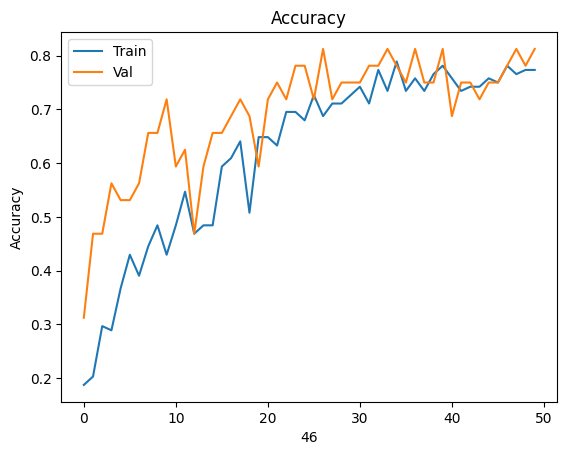

In [ ]:
# Visualisation
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# Entraînement du modèle augmenté
history2 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50
)

Epoch 1/50
11/11 [==============================] - 13s 599ms/step - loss: 2.2978 - accuracy: 0.0994 - val_loss: 2.2735 - val_accuracy: 0.1667
Epoch 2/50
11/11 [==============================] - 4s 348ms/step - loss: 2.2906 - accuracy: 0.1242 - val_loss: 2.2678 - val_accuracy: 0.1250
Epoch 3/50
11/11 [==============================] - 6s 560ms/step - loss: 2.2728 - accuracy: 0.1801 - val_loss: 2.2554 - val_accuracy: 0.1250
Epoch 4/50
11/11 [==============================] - 4s 388ms/step - loss: 2.2764 - accuracy: 0.1591 - val_loss: 2.2326 - val_accuracy: 0.2708
Epoch 5/50
11/11 [==============================] - 5s 504ms/step - loss: 2.2714 - accuracy: 0.1591 - val_loss: 2.2074 - val_accuracy: 0.2708
Epoch 6/50
11/11 [==============================] - 5s 474ms/step - loss: 2.2411 - accuracy: 0.2236 - val_loss: 2.2008 - val_accuracy: 0.2917
Epoch 7/50
11/11 [==============================] - 4s 387ms/step - loss: 2.2293 - accuracy: 0.2236 - val_loss: 2.1811 - val_accuracy: 0.3333
Epoch

In [ ]:
model.save('face_recognise.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3_input (InputL  [(None, 250, 250, 3)]     0         
 ayer)                                                           
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 98)                100450    
                                                           

In [ ]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

4/4 [==============================] - 1s 431ms/step - loss: 1.7163 - accuracy: 0.7167
Test Accuracy: 71.67%


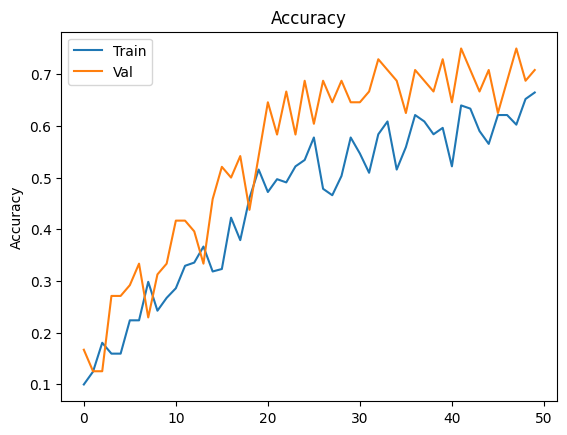

In [ ]:
# Visualisation
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
# Créer le générateur pour l'ensemble de test
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(250, 250),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Important pour la correspondance des prédictions et des étiquettes
)

Found 60 images belonging to 10 classes.


In [ ]:
history3 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=70
)

Epoch 1/70
12/12 [==============================] - 13s 725ms/step - loss: 2.2980 - accuracy: 0.1243 - val_loss: 2.2923 - val_accuracy: 0.0625
Epoch 2/70
12/12 [==============================] - 4s 365ms/step - loss: 2.2710 - accuracy: 0.2054 - val_loss: 2.2757 - val_accuracy: 0.0625
Epoch 3/70
12/12 [==============================] - 4s 359ms/step - loss: 2.2690 - accuracy: 0.2000 - val_loss: 2.2702 - val_accuracy: 0.2500
Epoch 4/70
12/12 [==============================] - 6s 515ms/step - loss: 2.2627 - accuracy: 0.2649 - val_loss: 2.2352 - val_accuracy: 0.3750
Epoch 5/70
12/12 [==============================] - 4s 354ms/step - loss: 2.2572 - accuracy: 0.2703 - val_loss: 2.2303 - val_accuracy: 0.3125
Epoch 6/70
12/12 [==============================] - 6s 488ms/step - loss: 2.2352 - accuracy: 0.3081 - val_loss: 2.2037 - val_accuracy: 0.5000
Epoch 7/70
12/12 [==============================] - 4s 355ms/step - loss: 2.2369 - accuracy: 0.2811 - val_loss: 2.1938 - val_accuracy: 0.5000
Epoch

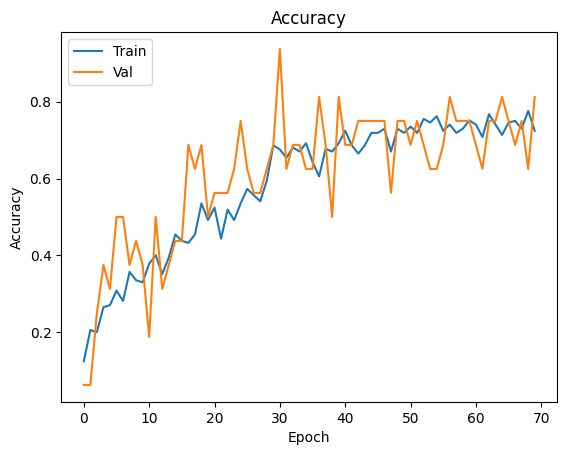

In [ ]:
# Visualisation
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Chargement du modèle pré-entrainé
base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg', input_shape=image_size + (3,))

# Construction du modèle
model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(classes_train), activation='softmax'))

# Congeler les couches du modèle de base pour l'entraînement
for layer in base_model.layers:
    layer.trainable = False

# Dégeler les 10 dernières couches du modèle
# N = 10
# for layer in base_model3.layers[:-N]:
#     layer.trainable = False
# for layer in base_model3.layers[-N:]:
#     layer.trainable = True



#  couche dense finale nommée 'predictions'
# model.layers.pop()  # Supprime la dernière couche
# new_output_layer = Dense(len(classes_train), activation='softmax', name='output_layer')(model.layers[-1].output)
# model = Model(inputs=model.inputs, outputs=new_output_layer)


model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
history4 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=100
)

Epoch 1/100
6/6 [==============================] - 13s 955ms/step - loss: 2.6628 - accuracy: 0.3018 - val_loss: 1.6072 - val_accuracy: 0.5625
Epoch 2/100
6/6 [==============================] - 4s 631ms/step - loss: 1.2398 - accuracy: 0.6095 - val_loss: 0.6165 - val_accuracy: 0.8125
Epoch 3/100
6/6 [==============================] - 4s 744ms/step - loss: 0.7011 - accuracy: 0.7692 - val_loss: 0.2127 - val_accuracy: 0.9375
Epoch 4/100
6/6 [==============================] - 5s 849ms/step - loss: 0.3325 - accuracy: 0.9112 - val_loss: 0.1947 - val_accuracy: 0.8750
Epoch 5/100
6/6 [==============================] - 4s 717ms/step - loss: 0.2063 - accuracy: 0.9527 - val_loss: 0.1527 - val_accuracy: 0.9375
Epoch 6/100
6/6 [==============================] - 6s 1s/step - loss: 0.2015 - accuracy: 0.9408 - val_loss: 0.0676 - val_accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 4s 589ms/step - loss: 0.2316 - accuracy: 0.9290 - val_loss: 0.1819 - val_accuracy: 0.8750
Epoch 8/100
6/6

In [ ]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 [==============================] - 0s 164ms/step - loss: 0.4005 - accuracy: 0.9677
Test Accuracy: 96.77%


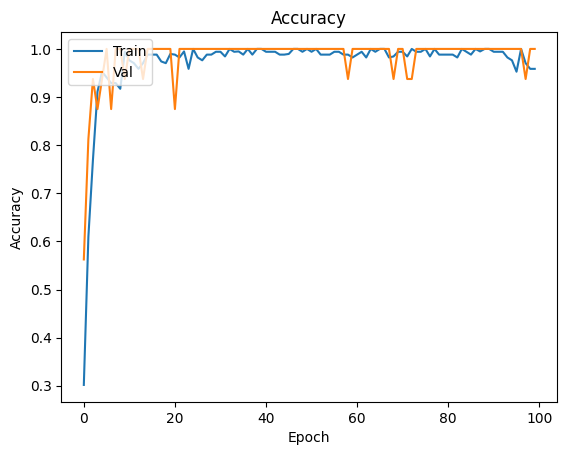

In [ ]:
# Visualisation
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model2.save('face_recognise_plus.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=16,
    class_mode='categorical',
    shuffle=False ) #ne pas mélanger l'ordre des images afin de faciliter la vérification

In [38]:
# test de prediction:
from PIL import Image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import  img_to_array


# Chemin vers le modèle sauvegardé et le dossier de validation
model_path = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/face_recognise_plus.h5'# model
#model_path = './face_recognise_plus.h5'
file_path1 = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/User.1/1.12.jpg'
file_path2 = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/dataset/User.3/3.10.jpg'
file_path3 = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/dataset/User.5/7.9.jpg'
file_path4 = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/dataset/User.5/7.25.jpg'
file_path5 = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/dataset/User.7/9.11.jpg'
file_path7 = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/User.8/19.jpg'
file_path6 = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/User.9/10.jpg'
model = load_model(model_path)

# Taille des images attendue par le modèle
image_size = (250,250)

def load_and_preprocess_image(file_path, target_size=image_size):
    # Charger l'image avec PIL
    img = Image.open(file_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img)
    # Ajouter une dimension de batch
    img_array = np.expand_dims(img_array, axis=0)
    img_processed =  preprocess_input(img_array)

    return img_processed

image1 = load_and_preprocess_image(file_path1)
prediction1 = model.predict(image1)

image2 = load_and_preprocess_image(file_path2)
prediction2 = model.predict(image2)

image3 = load_and_preprocess_image(file_path3)
prediction3 = model.predict(image3)

image4 = load_and_preprocess_image(file_path4)
prediction4 = model.predict(image4)

image5 = load_and_preprocess_image(file_path5)
prediction5 = model.predict(image5)

image6 = load_and_preprocess_image(file_path6)
prediction6 = model.predict(image6)

image7 = load_and_preprocess_image(file_path7)
prediction7 = model.predict(image7)

1/1 [==============================] - 0s 49ms/step


In [17]:
file_pathAH = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/User.5/7.9.jpg'

imageAH = load_and_preprocess_image(file_pathAH)
predictionAH = model.predict(imageAH)

1/1 [==============================] - 0s 37ms/step


In [18]:
if np.max(predictionAH) <0.6 : print('personne non reconnue')
else: print( np.argmax(predictionAH))

5


In [ ]:
print(classes_dir)

['User.1', 'User.4', 'User.3', 'User.2', 'User.5', 'User.7', 'User.6', 'User.10', 'User.8', 'User.9']


In [ ]:
print(classes_test)

['User.1', 'User.4', 'User.3', 'User.2', 'User.5', 'User.7', 'User.6', 'User.10', 'User.8', 'User.9']


In [ ]:
print(predicted_classes)

[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 5 6 6 7 7 7 7 8 8 8 9 9 9]


In [ ]:
print(y_true)

[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 5 6 6 6 7 7 7 8 8 8 9 9 9]


In [ ]:
np.argmax(prediction1)


0

In [ ]:
np.argmax(prediction2)

3

In [ ]:
np.argmax(prediction3)

5

In [ ]:
np.argmax(prediction4)

3

In [ ]:
np.argmax(prediction5)

7

In [ ]:
np.argmax(prediction6)

9

In [ ]:
np.argmax(prediction7)

8

In [ ]:
# Prédire les classes des images avec le modèle
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)


2/2 [==============================] - 1s 121ms/step


In [ ]:
# Obtenir les étiquettes de classe prédites
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
# Vraies étiquettes
true_classes = test_generator.classes

# Calcul de l'accuracy
accuracy = np.mean(predicted_classes == true_classes)
print(f"Test Accuracy : {accuracy*100:.2f}%")


Test Accuracy : 96.77%


In [46]:
def detect(gray):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        return roi_gray  # Return face region
    return None  # Return None




In [36]:
import cv2
import os
import shutil

# # Loading the cascades
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/Haarcascades/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('../Haarcascades/haarcascade_eye.xml')
file_pathAH_camera= '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/User.5/7.26.jpg'
file_pathSof_camera= '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/User.8/IMG_20231124_184644.jpg'
file_pathTib_camera = '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/User.9/IMG_20231125_122740.jpg'

In [49]:

img2 = cv2.imread(file_pathTib_camera)
img1 = cv2.imread(file_pathSof_camera)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# Detect face

face_roi1= detect(gray1)
face_roi2= detect(gray2)
#dest_file_path = os.path.join(src_dir, file)
cv2.imwrite('/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/imgSF.jpg', face_roi1)
cv2.imwrite('/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/imgTib.jpg', face_roi2)



True

In [52]:
img_path_SF= '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/imgSF.jpg'
img_path_Tib= '/content/drive/MyDrive/ProjetIA/Real_time_face_recognition/face_dataset/data/test/imgTib.jpg'

image1 = load_and_preprocess_image(img_path_SF)
image2 = load_and_preprocess_image(img_path_Tib)
# list_img = [face_roi1, face_roi2]
# for face_roi in list_img
  #if face_roi is not None:


predictionSF= model.predict(image1)
if np.max(predictionSF) <0.6 : print('personne non reconnue')
else: print( np.argmax(predictionSF))


1/1 [==============================] - 0s 29ms/step
8


In [53]:
predictionTib= model.predict(image2)
if np.max(predictionTib) <0.6 : print('personne non reconnue')
else: print( np.argmax(predictionTib))

1/1 [==============================] - 0s 27ms/step
9


# Conclusion


# Le model detecte et identifie les personnes du dataset local à 100%. Mais peut se tromper sur des personnes externes au dataset (peut prédire une identification alors que la personne est inconnue)




---

